In [268]:
from datetime import datetime
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [269]:
df = pd.read_csv('owid-covid-data.csv')

In [270]:
df = df.loc[df['location'] == "France"]
df = df.loc[df['new_cases'] != 0]


In [271]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
39217,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39218,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39221,FRA,Europe,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39222,FRA,Europe,France,2020-01-29,5.0,1.0,0.714,NaN,NaN,0.000,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39225,FRA,Europe,France,2020-02-01,6.0,1.0,0.429,NaN,NaN,0.000,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39232,FRA,Europe,France,2020-02-08,11.0,5.0,0.714,NaN,NaN,0.000,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39239,FRA,Europe,France,2020-02-15,12.0,1.0,0.143,1.0,1.0,0.143,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39249,FRA,Europe,France,2020-02-25,14.0,2.0,0.286,1.0,0.0,0.000,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39250,FRA,Europe,France,2020-02-26,18.0,4.0,0.857,2.0,1.0,0.143,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
39251,FRA,Europe,France,2020-02-27,38.0,20.0,3.714,2.0,0.0,0.143,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 39217 to 39836
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   iso_code                                 594 non-null    object 
 1   continent                                594 non-null    object 
 2   location                                 594 non-null    object 
 3   date                                     594 non-null    object 
 4   total_cases                              594 non-null    float64
 5   new_cases                                593 non-null    float64
 6   new_cases_smoothed                       591 non-null    float64
 7   total_deaths                             588 non-null    float64
 8   new_deaths                               588 non-null    float64
 9   new_deaths_smoothed                      591 non-null    float64
 10  total_cases_per_million                  594

In [273]:
df["date"] = pd.to_datetime(df["date"])

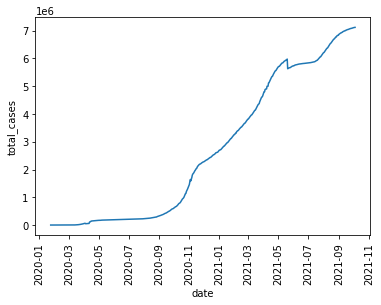

In [274]:
sns.lineplot(x="date", y="total_cases", data=df);
plt.xticks(rotation=90);

In [275]:
START_DATE = datetime(2020, 3, 15)

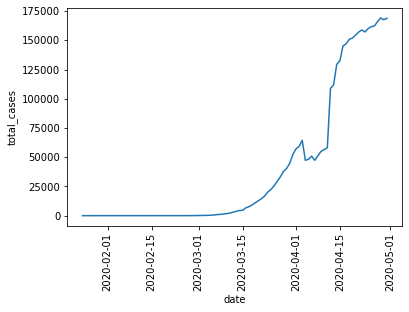

In [276]:

sns.lineplot(x="date", y="total_cases", data=df.loc[df["date"] < datetime(2020, 5, 1)]);
plt.xticks(rotation=90);

In [277]:
START_DATE = datetime(2020, 3, 15)

In [278]:
df = df.loc[df["date"] > START_DATE, :]

In [279]:
df["day_number"] = np.arange(df.shape[0]) + 1

In [280]:
train_size = int(df.shape[0] * 0.8)
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

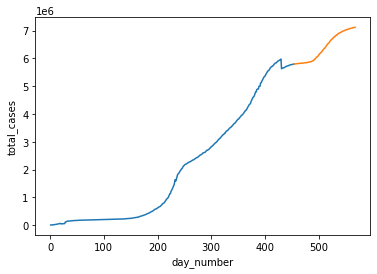

In [281]:
sns.lineplot(x="day_number", y="total_cases", data=train_df);
sns.lineplot(x="day_number", y="total_cases", data=test_df);

<h2>Линейная</h2>

In [282]:
model = LinearRegression()

In [283]:
TRAIN_FEATURES = ["day_number"]

In [284]:
model.fit(train_df[TRAIN_FEATURES], train_df["total_cases"])

LinearRegression()

In [285]:
prediction = model.predict(test_df[TRAIN_FEATURES])


In [286]:
mean_squared_error(test_df["total_cases"], prediction)

45845465967.49886

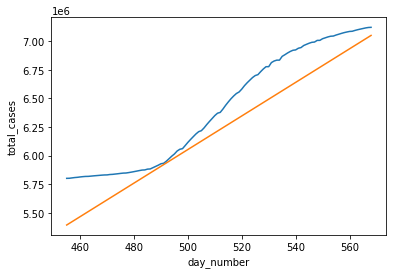

In [287]:
sns.lineplot(x="day_number", y="total_cases", data=test_df);
sns.lineplot(x=test_df["day_number"], y=prediction);

In [288]:
x = (test_df["total_cases"] - prediction)

In [289]:
print(f'Среднее X для Экспоненты: {x.mean()}')

print(f'Дисперсия X для Эспоненты: {x.var()}')

Среднее X для Экспоненты: 188725.1693960021
Дисперсия X для Эспоненты: 10318792124.338108


<h2>Экспонента</h2>

In [290]:
model.fit(train_df[TRAIN_FEATURES], np.log(train_df["total_cases"]))

LinearRegression()

In [291]:
prediction = model.predict(test_df[TRAIN_FEATURES])

In [292]:
prediction_train = model.predict(train_df[TRAIN_FEATURES])

In [293]:
mean_squared_error(test_df["total_cases"], prediction)

41353853968085.08

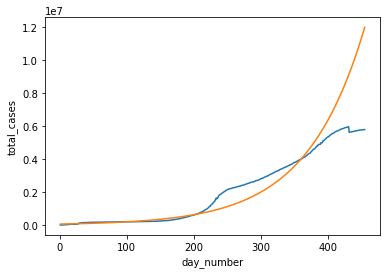

In [294]:
sns.lineplot(x="day_number", y="total_cases", data=train_df);
sns.lineplot(x=train_df["day_number"], y=np.exp(prediction_train));

In [295]:
x = (test_df["total_cases"] - prediction)

In [296]:
print(f'Среднее X для Экспоненты: {x.mean()}')

print(f'Дисперсия X для Эспоненты: {x.var()}')

Среднее X для Экспоненты: 6411684.235089618
Дисперсия X для Эспоненты: 246319938805.94626


<h2>Сигмойда</h2>

In [297]:
train_df["new_colomn"] = train_df["day_number"] ** 2

In [298]:
test_df["new_colomn"] = test_df["day_number"] ** 2

In [299]:
TRAIN_FEATURES = ["day_number", "new_colomn"]

In [300]:
model.fit(train_df[TRAIN_FEATURES], np.log1p(train_df["new_cases"].fillna(0).clip(lower=0)))


LinearRegression()

In [301]:
prediction = model.predict(test_df[TRAIN_FEATURES].fillna(0).clip(lower=0))


In [302]:
test_df["new_total_cases"] = test_df["total_cases"]
test_df["new_new_cases"] = test_df["new_cases"]


In [303]:
test_df["new_total_cases"] = 0

In [304]:
for item in range(len(test_df["new_total_cases"])):
    if item == 0:
        test_df["new_total_cases"].iloc[0] = train_df["total_cases"].iloc[-1]
    else:
        test_df["new_total_cases"].iloc[item] = test_df["new_total_cases"].iloc[item-1] + np.exp(prediction[item])


/home/uzhastin/miniconda3/envs/mlisuct/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


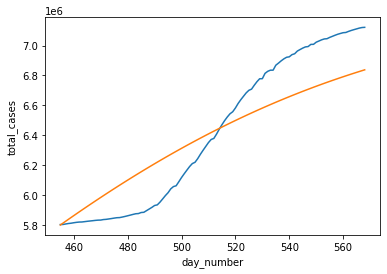

In [312]:
sns.lineplot(x="day_number", y="total_cases", data=test_df);
sns.lineplot(x=test_df["day_number"], y=test_df["new_total_cases"]);

In [306]:
mean_squared_error(test_df["new_total_cases"], prediction)

40884291157867.086

In [307]:
x = (test_df["new_total_cases"] - prediction)

In [308]:
print(f'Среднее X для Сигмойды: {x.mean()}')

print(f'Дисперсия X для Сигмойды: {x.var()}')

Среднее X для Сигмойды: 6386842.868910115
Дисперсия X для Сигмойды: 93348169309.52473
